# Natural Language Processing Assignment 1

In [54]:
#Do the respective imports

from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [133]:
def return_freq_dict(length_prop):
    #Function to return the Words with their respective Frequency in the form of an Dictionary
    data = open('tom_sawyer.txt')
    lines = data.readlines()
    lines = lines[:int(length_prop*len(lines))]
    d = {}
    words_final_lst = []
    for i in lines:
        line  = i.lower()
        for j in i:
            if j not in "abcdefghijklmnopqrstuvwxyx1234567890":
                line = line.replace(j,' ')
        words = word_tokenize(line.lower().decode('utf-8').encode("ascii", "ignore").strip())
        for j in words:
            words_final_lst.append(j)
            if j in d:
                d[j]+=1
            else:
                d[j] = 1
            
    return d,words_final_lst



def compute_func(X,K,beta):
    #Fuction to compute the Size of Vocabulary based on K and Beta and Size of Corpus
    return K*(X**beta)


def frame_compute(d):
    #Function to return a Dataframe with ranks, Prod of Frequency and Ranks
    sorts = d.values()
    sorts.sort()
    vals = 10
    lst = set(d.values())
    lst = list(lst)
    lst.sort()
    lst = lst[::-1]
    df = pd.DataFrame({'Keys':d.keys()})
    df['Freq'] =  [d[i] for i in df['Keys']]
    df['Rank'] =  [lst.index(d[i]) + 1 for i in df['Keys']]
    df['Prod'] =  df['Freq']*df['Rank']
    return df

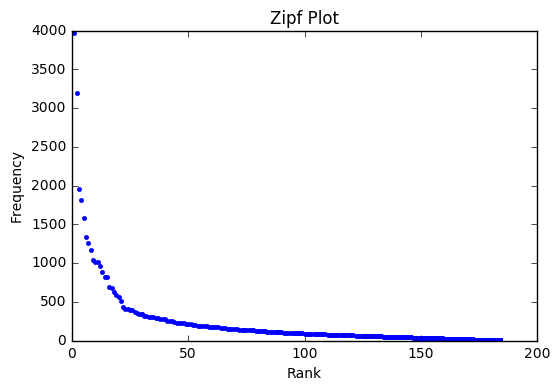

In [145]:
#Zipf's Plot of Rank vs Freq
d,final_words = return_freq_dict(1)
df  = frame_compute(d)
plt.plot(df['Rank'],df['Freq'],'.')
plt.title("Zipf Plot")
plt.xlabel('Rank')
plt.ylabel("Frequency")
plt.show()

We can see that in the above plot the Frequency of the Word is inversely proportional to its rank!
It satisfies the Zip's Law

In [146]:
type_count = df['Keys'].count()
token_count = df['Freq'].sum()
print ("No of Tokens are ",token_count)
print ("No of Types are ",type_count)
print ("Type token ratio is ",type_count*1.0/token_count)

('No of Tokens are ', 77755)
('No of Types are ', 7643)
('Type token ratio is ', 0.09829592952221722)


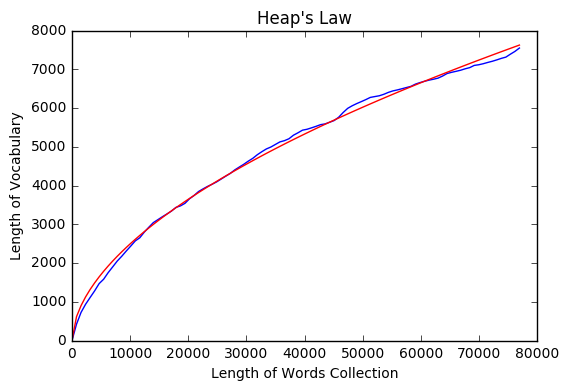

Red is the estimated Curve using Beta and K
Blue is the actual relation between Size of Corpus and Size of Vocabulary
('Value of Beta is ', 0.5477448916320493)
('Value of K is ', 16.057912591312498)


In [148]:
x_axis = []
y_axis = []

iter = 100
for i in range(iter):
    curr_len = int(len(final_words)*i*1.0/iter)
    curr_words = final_words[:curr_len]
    uniq = len(list(set(curr_words)))
    y_axis.append(uniq)
    x_axis.append(curr_len)

    
    
x_axis = np.array(x_axis)
y_axis = np.array(y_axis)

popt, pcov = curve_fit(compute_func, x_axis, y_axis)


K = popt[0]

beta = popt[1]

plt.plot(x_axis,y_axis,'b-')

plt.plot(x_axis,K*(x_axis**beta),'r-')
plt.title("Heap's Law")
plt.xlabel("Length of Words Collection")
plt.ylabel("Length of Vocabulary")

plt.show()

print ("Red is the estimated Curve using Beta and K")
print ("Blue is the actual relation between Size of Corpus and Size of Vocabulary")
print ("Value of Beta is ",beta)
print ("Value of K is ",K)


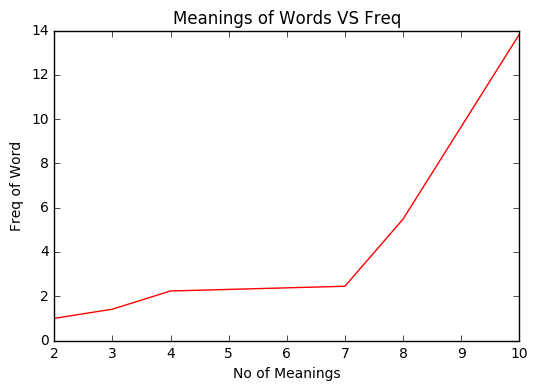

In [158]:
#Link is https://www.vocabulary.com/dictionary/
plt.close('all')
words = ['cricket','bat','bore','key','light','time']
count = [2,3,4,7,8,10]


resp_freq = np.array([d[i] for i in words])

fig = plt.figure()
plt.plot(count,resp_freq**.5,"r-")
plt.title('Meanings of Words VS Freq')
plt.xlabel('No of Meanings')
plt.ylabel('Freq of Word')
plt.plot()
plt.show()        





This law generally holds for words with higher ranks.

# Zipf's Law of Word Length vs Word Frequency

In [149]:
length_dict = {}
count_dict = {}
np_array = df.as_matrix()
for i in np_array:
    string = i[0]
    freq = i[1]
    #print (string,freq)
    if len(string) in length_dict:
        count_dict[len(string)]+=1
        length_dict[len(string)]+=freq
    else:
        count_dict[len(string)]=1
        length_dict[len(string)]=freq

/home/rithwik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


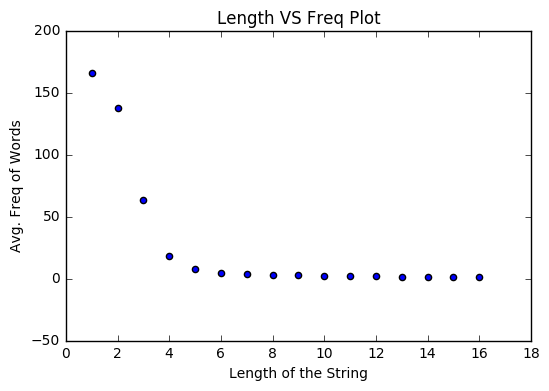

In [150]:
fig = plt.figure()
x_axis = length_dict.keys()

plt.scatter(x_axis,[length_dict[i]*1.0/count_dict[i] for i in x_axis])
plt.title('Length VS Freq Plot')
plt.xlabel("Length of the String")
plt.ylabel("Avg. Freq of Words")
plt.show()

It's clear that strings with lesser length are used more frequently than others.
This law holds almost everywhere. People tend to use smaller words to describe their work.